# Unit3-Example1 Use of KNN (K-Nearest Neighbor) classification model 
## Subject: Machine Learning - MSc. Computational Biology 
Author: Esteban García-Cuesta, Departamento de Inteligencia Artificial, UPM (License CC-BY-NC)

This code has been developed to be used exclusively for educational purposes.


## Objectives: 
  - Learn how the KNN model works
  - Learn how to use the validation methodology for KNN
  - Learn how to interpret the results

## Part I Validation using train/test split
In this part we will use two sets (training and testing) to train and test the KNN model.
We will also analyze and interpret the results using the knowledge adquired in the topic validation (see previous classes). Among others we will interpret the confusion matrix and how to obtain the best value of K.

## Part II Validation using cross-validation
In this part we will use the cross-validation approach to set the best K of the KNN model. We will discuss the differences with Part I and we will interpret the results.

## TO-DO at home
  1. Change the standard deviation of the blobs to 1.5 for both axis and re-run the part II several times. What happened? Explain it.
  2. Change the standard deviation of the blobs to 0.4 for both axis and re-run the part II several times. What happened? Explain it.


Error in the training point:-1.297690834250671,1.5882567358963247class: 0
Error in the training point:0.20099282713289846,-0.7827168214015343class: 0
Error in the training point:0.6808030643839129,-0.1845598075521533class: 1
Error in the training point:0.7306478238323462,0.3324633122909819class: 1
Error in the training point:0.946912354352621,0.20287515449275273class: 1
Error in the testing point:1.1448302973775477,-0.14996846170862754class: 1


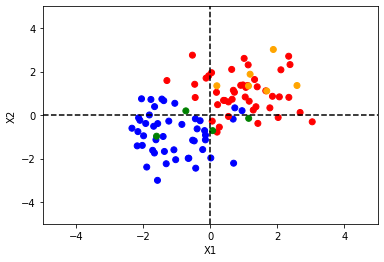

The train accuracy is: 0.9444444444444444
The test accuracy is: 0.9


In [101]:
#Part I Using train and test sets

from sklearn.datasets import make_blobs
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#Define the parameters of the two artificial clusters that we want to create 
n_samples = 100
centers = [[1,1],[-1, -1]]

X, y = make_blobs(n_samples=n_samples,
cluster_std=[[0.90,0.9],[0.9,0.9]],
random_state=0,
centers = centers)
contTrain = 0
contTest = 0

# Create an instance of K - nearest neighbor classifier
knn = neighbors.KNeighborsClassifier ( n_neighbors = 7, metric='euclidean')

# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.10, random_state=42)

# Train the classifier
knn.fit(XTrain , yTrain)

# Compute the train prediction according to the model
yhatTrain = knn.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1
    else:
        print('Error in the training point:' + str(XTrain[i,0]) + ',' + str(XTrain[i,1]) + 'class: ' + str(yTrain[i]))

# Compute the test prediction according to the model
yhatTest = knn.predict(XTest)

# Check the result on the test examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTest))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1
    else:
        print('Error in the testing point:' + str(XTest[i,0]) + ',' + str(XTest[i,1]) + 'class: ' + str(yTest[i]))

#Plot the training and testing points (Train class 0 = red, Train class 1 = blue, Test class 0 = orange, Test class 1 = green)
fig, ax = plt.subplots()
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
color= ['red' if l == 0 else 'blue' for l in yTrain]
plt.scatter(XTrain[:,0],XTrain[:,1], color = color)
plt.xlabel('X1')
plt.ylabel('X2')

color= ['orange' if l == 0 else 'green' for l in yTest]
plt.scatter(XTest[:,0],XTest[:,1], color = color)
plt.xlabel('X1')
plt.ylabel('X2')
xyvalues = np.linspace(-5,5,20)
line = [0] * 20
plt.plot(xyvalues, line, '--', color='k')
plt.plot(line, xyvalues, '--', color='k')

plt.show()

#Return the metric of accuracy
print('The train accuracy is: ' + str(contTrain/len(yTrain)))
print('The test accuracy is: ' + str(contTest/len(yTest)))

In [97]:
#Part I Interpretation of confusion matrix 

from sklearn.metrics import classification_report,confusion_matrix

#Print train confusion matrix
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(yTrain,yhatTrain))
print(classification_report(yTrain,yhatTrain))

#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print(classification_report(yTest,yhatTest))


----------------Train Confusion Matrix------------------
[[42  2]
 [ 3 43]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.96      0.93      0.95        46

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

----------------Test Confusion Matrix------------------
[[6 0]
 [1 3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



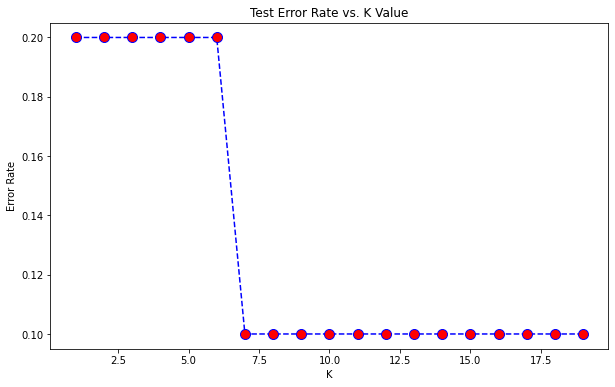

In [198]:
# Part I Choosing the best K
from sklearn.datasets import make_blobs
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#Define the parameters of the two artificial clusters that we want to create 
n_samples = 100
n_components = 2
centers = [[1,1],[-1, -1]]

X, y = make_blobs(n_samples=n_samples,
cluster_std=[[0.9,0.9],[0.9,0.9]],
random_state=0,
centers = centers)

# Loop to check different values of K
error_rate = []
# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.10, random_state=42)

for i in range (1,20):
    
    # Create an instance of K - nearest neighbor classifier
    knn = neighbors.KNeighborsClassifier ( n_neighbors = i, metric='euclidean')
    # Train the classifier
    knn.fit(XTrain , yTrain)

    # Compute the test prediction according to the model
    yhatTest = knn.predict(XTest)
    error_rate.append(np.mean(yhatTest != yTest))

#Plot the training and testing points (Train class 0 = red, Train class 1 = blue, Test class 0 = orange, Test class 1 = green)

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Test Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#The best validation error is obtained with K=7


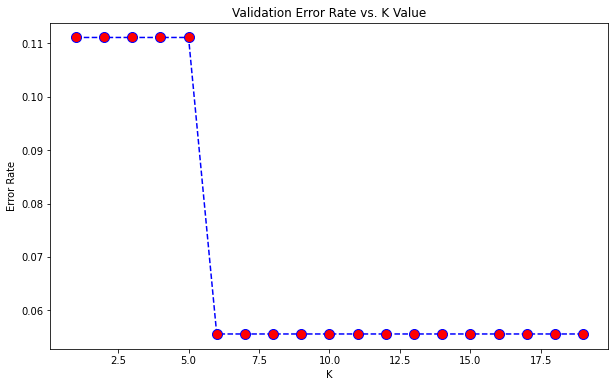

Fo a K:6 Test Error:0.05555555555555555


In [197]:
# Part I Choosing the best K using train and validation sets
from sklearn.datasets import make_blobs
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#Define the parameters of the two artificial clusters that we want to create 
n_samples = 100
n_components = 2
centers = [[1,1],[-1, -1]]

X, y = make_blobs(n_samples=n_samples,
cluster_std=[[0.9,0.9],[0.9,0.9]],
random_state=0,
centers = centers)

# Loop to check different values of K
error_rate = []
# Split train and test using sklearn.model_selection.train_test_split function
XTrainVal, XTest, yTrainVal, yTest = train_test_split(X, y, test_size=0.10, random_state=np.random.randint(0,40))

# Split train in train and validation using sklearn.model_selection.train_test_split function
XTrain, XVal, yTrain, yVal = train_test_split(XTrainVal, yTrainVal, test_size=0.20, random_state=np.random.randint(0,40))

for i in range (1,20):
    
    # Create an instance of K - nearest neighbor classifier
    knn = neighbors.KNeighborsClassifier ( n_neighbors = i, metric='euclidean')
    # Train the classifier
    knn.fit(XTrain , yTrain)

    # Compute the test prediction according to the model
    yhatVal = knn.predict(XVal)
    error_rate.append(np.mean(yhatVal != yVal))

#Plot the training and testing points (Train class 0 = red, Train class 1 = blue, Test class 0 = orange, Test class 1 = green)

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Validation Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#Obtain the best k and calculate results on test set
error_rate = np.asarray(error_rate)
k = np.where(error_rate == error_rate.min())
k=k[0][0]+1 #The first k of the list
knn = neighbors.KNeighborsClassifier ( n_neighbors = k, metric='euclidean')
knn.fit(XTrainVal , yTrainVal)

yhatTest = knn.predict(XTest)
print('Fo a K:' + str(k) + ' Test Error:' + str(np.mean(yhatVal != yVal)))

In [247]:
#Part II Using cross-validation

from sklearn.datasets import make_blobs
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV


#Define the parameters of the two artificial clusters that we want to create 
n_samples = 100
centers = [[1, 1],[-1, -1]]

X, y = make_blobs(n_samples=n_samples,
cluster_std=[[1.5,1.5],[1.5,1.5]],
random_state=0,
centers = centers)

# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.10, random_state=np.random.randint(0,40))

k_range = list(range(1, 21))
param_grid = {'n_neighbors': k_range}
  
# defining parameter range
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(XTrain,yTrain)

#Obtain the best k and calculate results on test set
k = grid_search.best_params_['n_neighbors']
knn = neighbors.KNeighborsClassifier ( n_neighbors = k, metric='euclidean')
knn.fit(XTrain , yTrain)

yhatTest = knn.predict(XTest)
print('For a K:' + str(k) + ' Test Error:' + str(np.mean(yhatTest != yTest)))

#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print(classification_report(yTest,yhatTest))

For a K:16 Test Error:0.4
----------------Test Confusion Matrix------------------
[[3 1]
 [3 3]]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.75      0.50      0.60         6

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

